In [2]:

#!pip3 install seaborn
#!pip3 install wordcloud
#!pip3 install nltk

In [3]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
from datetime import datetime, date, time
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator


import re
import nltk
from nltk.corpus import stopwords
import unicodedata
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize



In [4]:
twitter=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/twitter_regression_with_mlp.csv")
reddit=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/reddit_regression_with_mlp.csv")
training_data=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/prepared_hate_data_train.csv")

/Users/rebeccaharrison/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/rebeccaharrison/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# lemmatizing the data and removing stopwords
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') 
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

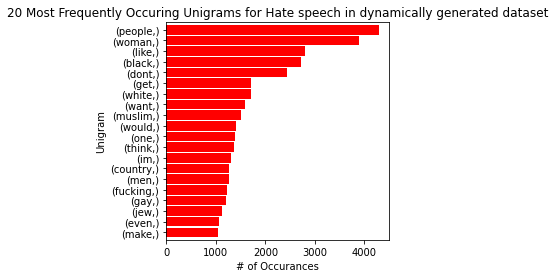

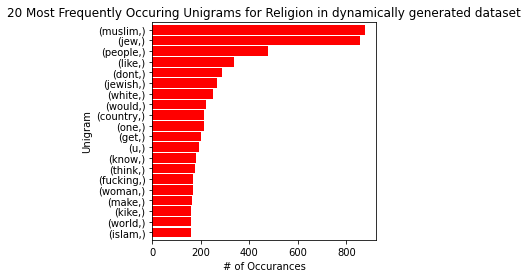

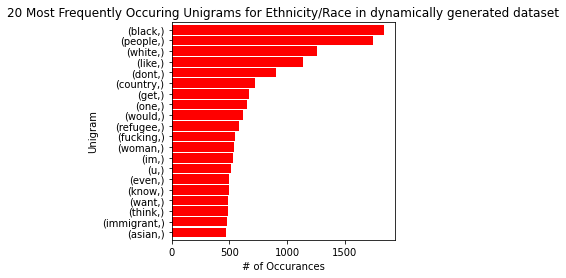

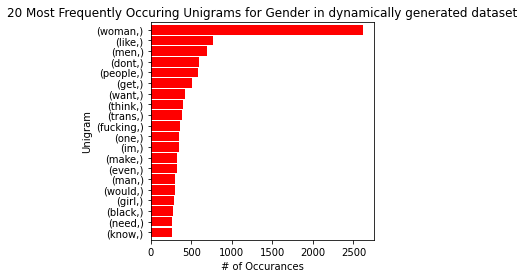

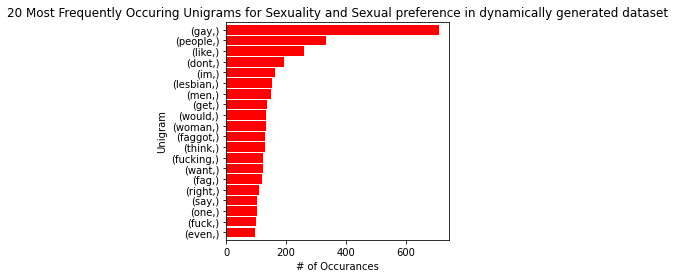

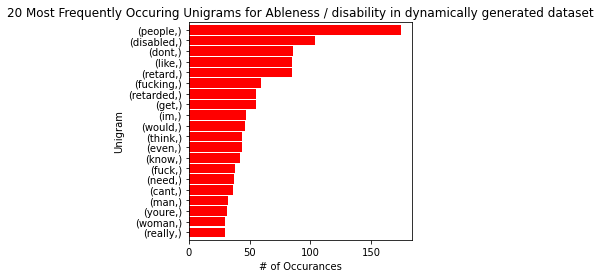

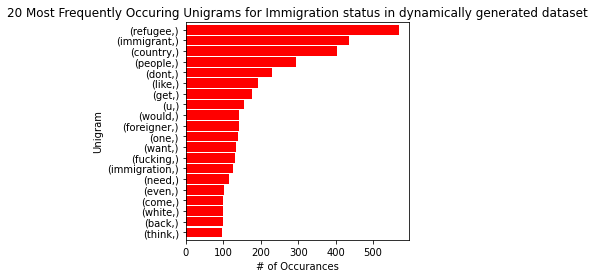

In [6]:
# Describing the words that are most common for  hate crime 
outcome_variables= ['Hate speech','Religion','Ethnicity/Race','Gender','Sexuality and Sexual preference','Ableness / disability','Immigration status']
for variable in outcome_variables:
    hate_words = basic_clean(''.join(str(training_data['text'].loc[training_data[variable]==1].tolist())))
    one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
    one_gram.sort_values().plot.barh(color='red', width=.9, figsize=(4, 4))
    plt.title('20 Most Frequently Occuring Unigrams for '+str(variable)+' in dynamically generated dataset')
    plt.ylabel('Unigram')
    plt.xlabel('# of Occurances')
    plt.show()

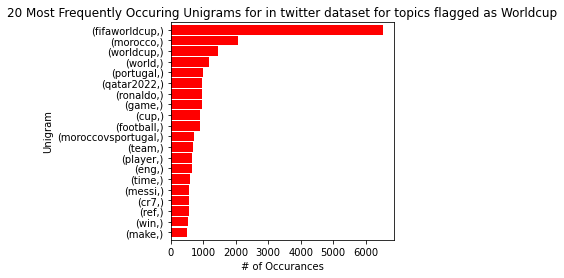

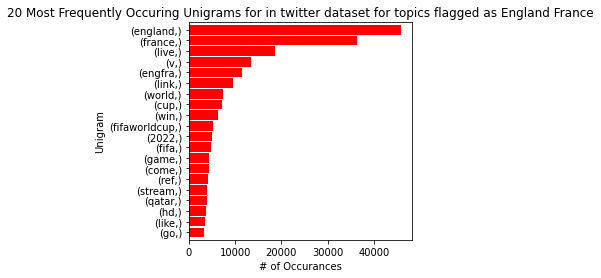

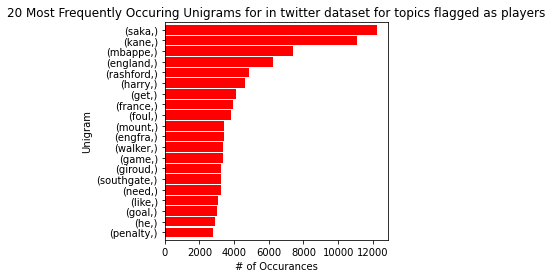

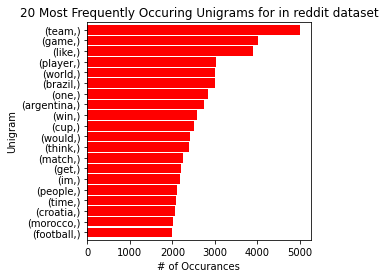

In [7]:
# Describing the words that are most commonly occuring in the twitter and reddit datasets

hate_words = basic_clean(''.join(str(twitter['text_nostop'].loc[twitter['rule']=="Worldcup"].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='red', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for in twitter dataset for topics flagged as Worldcup')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

hate_words = basic_clean(''.join(str(twitter['text_nostop'].loc[twitter['rule']=="England France"].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='red', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for in twitter dataset for topics flagged as England France')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

hate_words = basic_clean(''.join(str(twitter['text_nostop'].loc[twitter['rule']=="Players"].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='red', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for in twitter dataset for topics flagged as players')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

hate_words = basic_clean(''.join(str(reddit.text_nostop.tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='red', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for in reddit dataset')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

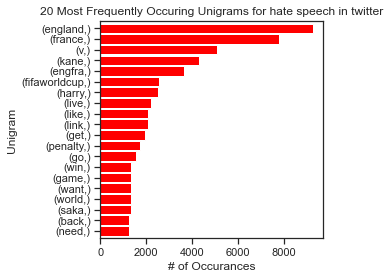

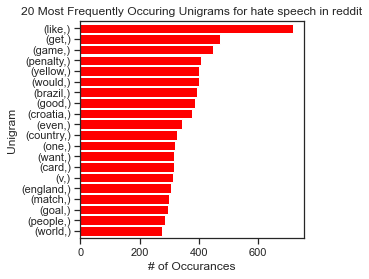

In [10]:
# unigrams in the hate speech detected tweets
hate_words = basic_clean(''.join(str(twitter['text'].loc[twitter['log_regression']==1].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='red', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for hate speech in twitter')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

hate_words = basic_clean(''.join(str(reddit['text'].loc[reddit['log_regression']==1].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='red', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for hate speech in reddit')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

In [11]:
twitter['created']=pd.to_datetime(twitter['created'])
twitter

Unnamed: 0  Unnamed: 0.1            id                   created  \
0                0             0  1.601650e+18 2022-12-10 18:29:58+00:00   
1                1             1  1.601650e+18 2022-12-10 18:29:57+00:00   
2                2             2  1.601650e+18 2022-12-10 18:29:57+00:00   
3                3             3  1.601650e+18 2022-12-10 18:29:58+00:00   
4                4             4  1.601650e+18 2022-12-10 18:29:58+00:00   
...            ...           ...           ...                       ...   
175442      175442        175485  1.601680e+18 2022-12-10 21:01:23+00:00   
175443      175443        175486  1.601680e+18 2022-12-10 21:01:23+00:00   
175444      175444        175487  1.601680e+18 2022-12-10 21:01:23+00:00   
175445      175445        175488  1.601680e+18 2022-12-10 21:01:23+00:00   
175446      175446        175489  1.601680e+18 2022-12-10 21:01:24+00:00   

                                                     text possibly_sensitive  \
0       WE LOVE LIAM PAYNE 💗\n #EnglandVsFrance #Engla...              False   
1                       What has Islam got to do with it?              False   
2         2002. That was also the Cup where Nigeria bo...              False   
3        Grant Wahl was a healthy individual just like...              False   
4                    #ssfootball France 🇫🇷 2 England 🇬🇧 1              False   
...                                                   ...                ...   
175442                  fuck it rematch croatia vs france              False   
175443                         Kane… I need my $300 back.              False   
175444  i’m wheezing because my boy is wearing his eng...              False   
175445  The only good thing about this is we get a Mor...              False   
175446  So close Rashford. Well done bro. #ENG #FIFAWo...              False   

                                  user verified            rule language  ...  \
0                                Judit    False  England France       en  ...   
1                      Antonio Plescia    False        Worldcup       en  ...   
2       Shiv Ramdas Traing To Rite Buk     True  England France       en  ...   
3                        Porfirio Diaz    False        Worldcup       en  ...   
4                          Vinny Munda    False  England France       en  ...   
...                                ...      ...             ...      ...  ...   
175442                           bryxn    False  England France       en  ...   
175443        YOUNG CHOP’S RIGHT TITTY    False         Players       en  ...   
175444                          Papa G    False  England France       en  ...   
175445                         Andrea.    False  England France       en  ...   
175446                     Luenic Luke    False         Players       en  ...   

       compound  log_regression  svc  dtc  random_forest  log_regression_rel  \
0        0.7125               0    1    1              1                   0   
1        0.0000               0    1    0              0                   0   
2        0.0000               0    0    0              0                   0   
3        0.4033               0    0    0              1                   0   
4        0.0000               0    0    0              1                   0   
...         ...             ...  ...  ...            ...                 ...   
175442  -0.5423               0    0    0              0                   0   
175443   0.0000               1    1    1              1                   0   
175444   0.0000               0    0    0              1                   0   
175445   0.4404               0    0    0              1                   0   
175446   0.3321               0    0    1              0                   0   

        log_regression_eth  log_regression_gend  neural_network  mlp_ethnicity  
0                        0                    0               1              1  
1                        0            

In [12]:
reddit=reddit.loc[reddit['created']!='zd7gng']
reddit['date']=pd.to_datetime(reddit['created'],unit='s')


In [13]:
print("Reddit dates from:",min(reddit['date']),"to",max(reddit['date']))
print("Twitter dates from:",min(twitter['created']),"to",max(twitter['created']))

Reddit dates from: 2022-12-04 23:51:10 to 2022-12-10 21:33:24
Twitter dates from: 2022-12-10 18:29:57+00:00 to 2022-12-10 21:01:24+00:00


In [14]:
reddit=reddit.loc[reddit['date']>='2022-12-10']
reddit=reddit.loc[reddit['date'].dt.time >=time(18,29)]

In [15]:
print("Reddit dates from:",min(reddit['date']),"to",max(reddit['date']))
print("Twitter dates from:",min(twitter['created']),"to",max(twitter['created']))

Reddit dates from: 2022-12-10 18:29:13 to 2022-12-10 21:33:24
Twitter dates from: 2022-12-10 18:29:57+00:00 to 2022-12-10 21:01:24+00:00


In [16]:
reddit = reddit.replace({'log_regression': {1: 'Hate', 0: 'Not hate'}})
twitter = twitter.replace({'log_regression': {1: 'Hate', 0: 'Not hate',}})
twitter = twitter.replace({'possibly_sensitive': {True: 'Sensitive', False: 'Not sensitive',}})
twitter = twitter.replace({'random_forest': {1: 'Hate', 0: 'Not hate',}})
twitter = twitter.replace({'neural_network': {1: 'Hate', 0: 'Not hate',}})
reddit = reddit.replace({'random_forest': {1: 'Hate', 0: 'Not hate',}})
reddit = reddit.replace({'neural_network': {1: 'Hate', 0: 'Not hate',}})
reddit = reddit.replace({'mlp_ethnicity': {1: 'Hate', 0: 'Not hate',}})
reddit = reddit.replace({'svc': {1: 'Hate', 0: 'Not hate',}})
reddit = reddit.replace({'dtc': {1: 'Hate', 0: 'Not hate',}})
reddit = reddit.replace({'log_regression_eth': {1: 'Hate', 0: 'Not hate',}})
twitter = twitter.replace({'mlp_ethnicity': {1: 'Hate', 0: 'Not hate',}})
twitter = twitter.replace({'svc': {1: 'Hate', 0: 'Not hate',}})
twitter = twitter.replace({'dtc': {1: 'Hate', 0: 'Not hate',}})
twitter = twitter.replace({'log_regression_eth': {1: 'Hate', 0: 'Not hate',}})

In [17]:
twitter['random_forest']

0             Hate
1         Not hate
2         Not hate
3             Hate
4             Hate
            ...   
175442    Not hate
175443        Hate
175444        Hate
175445        Hate
175446    Not hate
Name: random_forest, Length: 175447, dtype: object

In [18]:


#Creating count and percentage of log regression hate
reddit_log_graph = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['log_regression']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_log_graph['Hate percentage']=reddit_log_graph['Hate']/(reddit_log_graph['Hate']+reddit_log_graph['Not hate'])*100

tw_log_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['log_regression']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_log_graph['Hate percentage']=tw_log_graph['Hate']/(tw_log_graph['Hate']+tw_log_graph['Not hate'])*100





#Creating count and percentage of log regression hate for twitter where world cup is flagged

tw_log_graph_wconly = (
    twitter.loc[twitter['rule']=='Worldcup']
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['log_regression']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_log_graph_wconly['Hate percentage']=tw_log_graph_wconly['Hate']/(tw_log_graph_wconly['Hate']+tw_log_graph_wconly['Not hate'])*100

#The same for random forest
reddit_rando_graph = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['random_forest']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_rando_graph['Hate percentage']=reddit_rando_graph['Hate']/(reddit_rando_graph['Hate']+reddit_rando_graph['Not hate'])*100


tw_rando_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['random_forest']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_rando_graph['Hate percentage']=tw_rando_graph['Hate']/(tw_rando_graph['Hate']+tw_rando_graph['Not hate'])*100

# And also for the neural network
reddit_ann_graph = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['neural_network']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_ann_graph['Hate percentage']=reddit_ann_graph['Hate']/(reddit_ann_graph['Hate']+reddit_ann_graph['Not hate'])*100


tw_ann_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['neural_network']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_ann_graph['Hate percentage']=tw_ann_graph['Hate']/(tw_ann_graph['Hate']+tw_ann_graph['Not hate'])*100




In [32]:
#Creating count and percentage of log regression ethnicity based hate 
reddit_log_eth_graph = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['log_regression_eth']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_log_eth_graph['Hate percentage']=reddit_log_eth_graph['Hate']/(reddit_log_eth_graph['Hate']+reddit_log_eth_graph['Not hate'])*100

tw_log_eth_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['log_regression_eth']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_log_eth_graph['Hate percentage']=tw_log_eth_graph['Hate']/(tw_log_eth_graph['Hate']+tw_log_eth_graph['Not hate'])*100

# And also for the ethnicity based neural network
reddit_ann_graph_eth = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['mlp_ethnicity']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_ann_graph_eth['Hate percentage']=reddit_ann_graph_eth['Hate']/(reddit_ann_graph_eth['Hate']+reddit_ann_graph_eth['Not hate'])*100


tw_ann_graph_eth = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['mlp_ethnicity']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_ann_graph_eth['Hate percentage']=tw_ann_graph_eth['Hate']/(tw_ann_graph_eth['Hate']+tw_ann_graph_eth['Not hate'])*100


# And also for svc
reddit_svc_graph = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['svc']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_svc_graph['Hate percentage']=reddit_svc_graph['Hate']/(reddit_svc_graph['Hate']+reddit_svc_graph['Not hate'])*100


tw_svc_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['svc']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_svc_graph['Hate percentage']=tw_svc_graph['Hate']/(tw_svc_graph['Hate']+tw_svc_graph['Not hate'])*100

# And also for dtc
reddit_dtc_graph = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['dtc']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_dtc_graph['Hate percentage']=reddit_dtc_graph['Hate']/(reddit_dtc_graph['Hate']+reddit_dtc_graph['Not hate'])*100


tw_dtc_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['dtc']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_dtc_graph['Hate percentage']=tw_dtc_graph['Hate']/(tw_dtc_graph['Hate']+tw_dtc_graph['Not hate'])*100


In [20]:
#Creating count and percentage of sensitive stuff picked up through twitter
twitter_sensitive_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['possibly_sensitive']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
twitter_sensitive_graph['Hate percentage']=twitter_sensitive_graph['Sensitive']/(twitter_sensitive_graph['Sensitive']+twitter_sensitive_graph['Not sensitive'])*100


In [21]:
tw_log_graph.head()

log_regression                   created  Hate  Not hate  Hate percentage
0              2022-12-10 18:29:00+00:00     6        28        17.647059
1              2022-12-10 18:30:00+00:00   177       755        18.991416
2              2022-12-10 18:31:00+00:00   177       691        20.391705
3              2022-12-10 18:32:00+00:00   185       687        21.215596
4              2022-12-10 18:33:00+00:00   163       717        18.522727

<ipython-input-22-f89f63a7b075>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

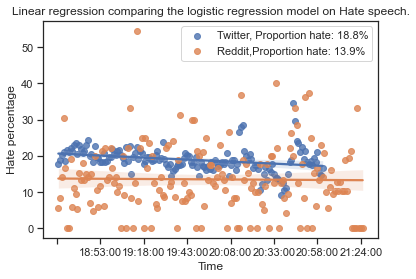

In [22]:
sns.set_theme(style="ticks")

proportion_twitter_logreg=twitter['log_regression'].value_counts(normalize=True)
proportion_twitter_logreg=round(proportion_twitter_logreg[1]*100,ndigits=1)
proportion_reddit_logreg=reddit['log_regression'].value_counts(normalize=True)
proportion_reddit_logreg=round(proportion_reddit_logreg[1]*100,ndigits=1)


# converting to readable format for regplot
tw_log_graph = tw_log_graph.sort_values('created')
tw_log_graph['date_f'] = pd.factorize(tw_log_graph['created'])[0] + 1
mapping = dict(zip(tw_log_graph['date_f'], tw_log_graph['created'].dt.time))

reddit_log_graph = reddit_log_graph.sort_values('date')
reddit_log_graph['date_f'] = pd.factorize(reddit_log_graph['date'])[0] + 1
mapping = dict(zip(reddit_log_graph['date_f'], reddit_log_graph['date'].dt.time))

# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter, Proportion hate: "+str(proportion_twitter_logreg)+"%"),
             data=tw_log_graph)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit,Proportion hate: "+str(proportion_reddit_logreg)+"%"),
             data=reddit_log_graph)
plt.title("Comparing Hate speech (logistic regression).")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.xlabel("Time")


<ipython-input-28-6fb79596c08a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

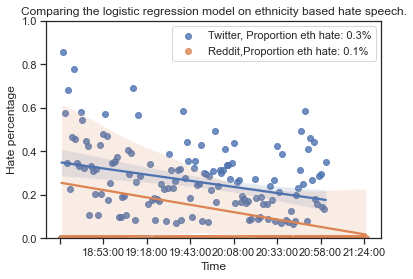

In [28]:
sns.set_theme(style="ticks")

proportion_twitter_logreg_eth=twitter['log_regression_eth'].value_counts(normalize=True)
proportion_twitter_logreg_eth=round(proportion_twitter_logreg_eth[1]*100,ndigits=1)
proportion_reddit_logreg_eth=reddit['log_regression_eth'].value_counts(normalize=True)
proportion_reddit_logreg_eth=round(proportion_reddit_logreg_eth[1]*100,ndigits=1)


# converting to readable format for regplot
tw_log_graph_eth = tw_log_eth_graph.sort_values('created')
tw_log_graph_eth['date_f'] = pd.factorize(tw_log_graph_eth['created'])[0] + 1
mapping = dict(zip(tw_log_graph_eth['date_f'], tw_log_graph_eth['created'].dt.time))

reddit_log_graph_eth = reddit_log_eth_graph.sort_values('date')
reddit_log_graph_eth['date_f'] = pd.factorize(reddit_log_graph_eth['date'])[0] + 1
mapping = dict(zip(reddit_log_graph_eth['date_f'], reddit_log_graph_eth['date'].dt.time))

# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter, Proportion eth hate: "+str(proportion_twitter_logreg_eth)+"%"),
             data=tw_log_graph_eth)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit,Proportion eth hate: "+str(proportion_reddit_logreg_eth)+"%"),
             data=reddit_log_graph_eth)
plt.title("Comparing the logistic regression model on ethnicity based hate speech.")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.ylim(0,1)
plt.xlabel("Time")

In [ ]:
twitter_count=twitter['log_regression'].value_counts(normalize=True)
round(twitter_count[1]*100,ndigits=1)



18.8

<ipython-input-88-7005ca1a99f2>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

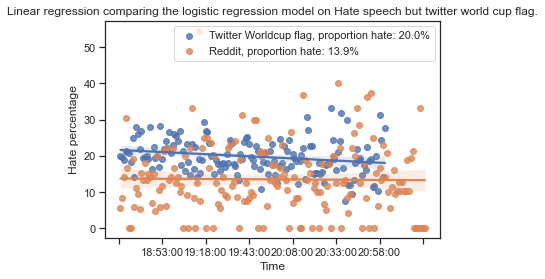

In [ ]:
tw_log_graph_wconly

# converting to readable format for regplot
tw_log_graph_wconly = tw_log_graph_wconly.sort_values('created')
tw_log_graph_wconly['date_f'] = pd.factorize(tw_log_graph_wconly['created'])[0] + 1
mapping = dict(zip(tw_log_graph_wconly['date_f'], tw_log_graph_wconly['created'].dt.time))

proportion_twitter_logreg_worldcup=twitter['log_regression'].loc[twitter['rule']=="Worldcup"].value_counts(normalize=True)
proportion_twitter_logreg_worldcup=round(proportion_twitter_logreg_worldcup[1]*100,ndigits=1)


# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter Worldcup flag, proportion hate: "+str(proportion_twitter_logreg_worldcup)+"%"),
             data=tw_log_graph_wconly)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit, proportion hate: "+str(proportion_reddit_logreg)+"%"),
             data=reddit_log_graph)
plt.title("Linear regression comparing the logistic regression model on Hate speech but twitter world cup flag.")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)

plt.legend()
plt.xlabel("Time")

<ipython-input-89-6a8cffd44677>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

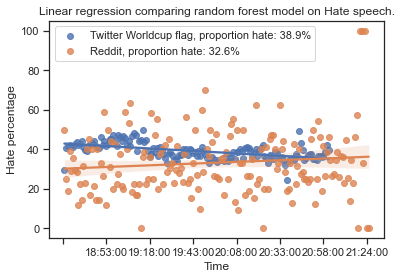

In [ ]:
#comparing the random forest

proportion_twitter_rando=twitter['random_forest'].value_counts(normalize=True)
proportion_twitter_rando=round(proportion_twitter_rando[1]*100,ndigits=1)
proportion_reddit_rando=reddit['random_forest'].value_counts(normalize=True)
proportion_reddit_rando=round(proportion_reddit_rando[1]*100,ndigits=1)

sns.set_theme(style="ticks")
# converting to readable format for regplot
tw_rando_graph = tw_rando_graph.sort_values('created')
tw_rando_graph['date_f'] = pd.factorize(tw_rando_graph['created'])[0] + 1
mapping = dict(zip(tw_rando_graph['date_f'], tw_rando_graph['created'].dt.time))

reddit_rando_graph = reddit_rando_graph.sort_values('date')
reddit_rando_graph['date_f'] = pd.factorize(reddit_rando_graph['date'])[0] + 1
mapping = dict(zip(reddit_rando_graph['date_f'], reddit_rando_graph['date'].dt.time))

# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter Worldcup flag, proportion hate: "+str(proportion_twitter_rando)+"%"),
             data=tw_rando_graph)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit, proportion hate: "+str(proportion_reddit_rando)+"%"),
             data=reddit_rando_graph)
plt.title("Linear regression comparing random forest model on Hate speech.")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.xlabel("Time")

<ipython-input-29-8f5991d61d8c>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

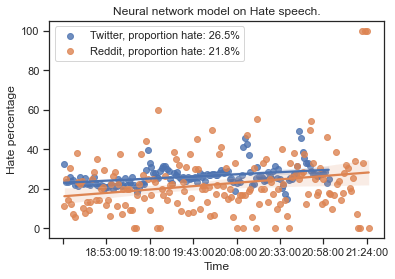

In [29]:
#comparing the neural network

proportion_twitter_ann=twitter['neural_network'].value_counts(normalize=True)
proportion_twitter_ann=round(proportion_twitter_ann[1]*100,ndigits=1)
proportion_reddit_ann=reddit['neural_network'].value_counts(normalize=True)
proportion_reddit_ann=round(proportion_reddit_ann[1]*100,ndigits=1)


sns.set_theme(style="ticks")
# converting to readable format for regplot
tw_ann_graph = tw_ann_graph.sort_values('created')
tw_ann_graph['date_f'] = pd.factorize(tw_ann_graph['created'])[0] + 1
mapping = dict(zip(tw_ann_graph['date_f'], tw_ann_graph['created'].dt.time))

reddit_ann_graph = reddit_ann_graph.sort_values('date')
reddit_ann_graph['date_f'] = pd.factorize(reddit_ann_graph['date'])[0] + 1
mapping = dict(zip(reddit_ann_graph['date_f'], reddit_ann_graph['date'].dt.time))

# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter, proportion hate: "+str(proportion_twitter_ann)+"%"),
             data=tw_ann_graph)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit, proportion hate: "+str(proportion_reddit_ann)+"%"),
             data=reddit_ann_graph)
plt.title("Neural network model on Hate speech.")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.xlabel("Time")

<ipython-input-33-265c06e3fa27>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

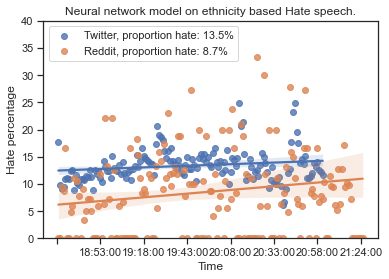

In [33]:
#comparing the neural network

proportion_twitter_ann_eth=twitter['mlp_ethnicity'].value_counts(normalize=True)
proportion_twitter_ann_eth=round(proportion_twitter_ann_eth[1]*100,ndigits=1)
proportion_reddit_ann_eth=reddit['mlp_ethnicity'].value_counts(normalize=True)
proportion_reddit_ann_eth=round(proportion_reddit_ann_eth[1]*100,ndigits=1)


sns.set_theme(style="ticks")
# converting to readable format for regplot
tw_ann_graph_eth = tw_ann_graph_eth.sort_values('created')
tw_ann_graph_eth['date_f'] = pd.factorize(tw_ann_graph_eth['created'])[0] + 1
mapping = dict(zip(tw_ann_graph_eth['date_f'], tw_ann_graph_eth['created'].dt.time))

reddit_ann_graph_eth = reddit_ann_graph_eth.sort_values('date')
reddit_ann_graph_eth['date_f'] = pd.factorize(reddit_ann_graph_eth['date'])[0] + 1
mapping = dict(zip(reddit_ann_graph_eth['date_f'], reddit_ann_graph_eth['date'].dt.time))

# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter, proportion hate: "+str(proportion_twitter_ann_eth)+"%"),
             data=tw_ann_graph_eth)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit, proportion hate: "+str(proportion_reddit_ann_eth)+"%"),
             data=reddit_ann_graph_eth)
plt.title("Neural network model on ethnicity based Hate speech.")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.ylim(0,40)
plt.xlabel("Time")

In [ ]:
twitter

Unnamed: 0  Unnamed: 0.1            id                   created  \
0                0             0  1.601650e+18 2022-12-10 18:29:58+00:00   
1                1             1  1.601650e+18 2022-12-10 18:29:57+00:00   
2                2             2  1.601650e+18 2022-12-10 18:29:57+00:00   
3                3             3  1.601650e+18 2022-12-10 18:29:58+00:00   
4                4             4  1.601650e+18 2022-12-10 18:29:58+00:00   
...            ...           ...           ...                       ...   
175442      175442        175485  1.601680e+18 2022-12-10 21:01:23+00:00   
175443      175443        175486  1.601680e+18 2022-12-10 21:01:23+00:00   
175444      175444        175487  1.601680e+18 2022-12-10 21:01:23+00:00   
175445      175445        175488  1.601680e+18 2022-12-10 21:01:23+00:00   
175446      175446        175489  1.601680e+18 2022-12-10 21:01:24+00:00   

                                                     text possibly_sensitive  \
0       WE LOVE LIAM PAYNE 💗\n #EnglandVsFrance #Engla...      Not sensitive   
1                       What has Islam got to do with it?      Not sensitive   
2         2002. That was also the Cup where Nigeria bo...      Not sensitive   
3        Grant Wahl was a healthy individual just like...      Not sensitive   
4                    #ssfootball France 🇫🇷 2 England 🇬🇧 1      Not sensitive   
...                                                   ...                ...   
175442                  fuck it rematch croatia vs france      Not sensitive   
175443                         Kane… I need my $300 back.      Not sensitive   
175444  i’m wheezing because my boy is wearing his eng...      Not sensitive   
175445  The only good thing about this is we get a Mor...      Not sensitive   
175446  So close Rashford. Well done bro. #ENG #FIFAWo...      Not sensitive   

                                  user verified            rule language  ...  \
0                                Judit    False  England France       en  ...   
1                      Antonio Plescia    False        Worldcup       en  ...   
2       Shiv Ramdas Traing To Rite Buk     True  England France       en  ...   
3                        Porfirio Diaz    False        Worldcup       en  ...   
4                          Vinny Munda    False  England France       en  ...   
...                                ...      ...             ...      ...  ...   
175442                           bryxn    False  England France       en  ...   
175443        YOUNG CHOP’S RIGHT TITTY    False         Players       en  ...   
175444                          Papa G    False  England France       en  ...   
175445                         Andrea.    False  England France       en  ...   
175446                     Luenic Luke    False         Players       en  ...   

       compound  log_regression       svc       dtc  random_forest  \
0        0.7125        Not hate      Hate      Hate           Hate   
1        0.0000        Not hate      Hate  Not hate       Not hate   
2        0.0000        Not hate  Not hate  Not hate       Not hate   
3        0.4033        Not hate  Not hate  Not hate           Hate   
4        0.0000        Not hate  Not hate  Not hate           Hate   
...         ...             ...       ...       ...            ...   
175442  -0.5423        Not hate  Not hate  Not hate       Not hate   
175443   0.0000            Hate      Hate      Hate           Hate   
175444   0.0000        Not hate  Not hate  Not hate           Hate   
175445   0.4404        Not hate  Not hate  Not hate           Hate   
175446   0.3321        Not hate  Not hate      Hate       Not hate   

        log_regression_rel  log_regression_eth  log_regression_gend  \
0                        0            Not hate                    0   
1                        0            Not hate                    0   
2                        0            Not hate                    0   
3                        0          

Text(0.5, 0, 'Time')

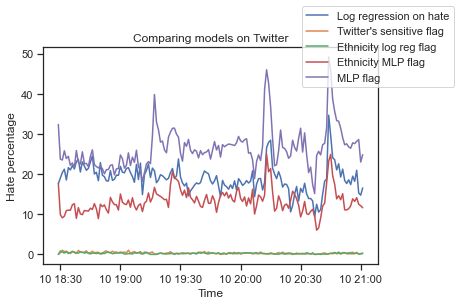

In [65]:
# Plot the sensitive twitter flag vs the hate speech models
ax=sns.lineplot(x="created", y="Hate percentage", label="Log regression on hate",
             data=tw_log_graph)
ax=sns.lineplot(x="created", y="Hate percentage", label="Twitter's sensitive flag",
             data=twitter_sensitive_graph)
ax=sns.lineplot(x="created", y="Hate percentage", label="Ethnicity log reg flag",
             data=tw_log_eth_graph)
ax=sns.lineplot(x="created", y="Hate percentage", label="Ethnicity MLP flag",
             data=tw_ann_graph_eth)
ax=sns.lineplot(x="created", y="Hate percentage", label="MLP flag",
             data=tw_ann_graph)
plt.title("Comparing models on Twitter")

plt.legend()
sns.move_legend(ax, "center", bbox_to_anchor=(1, 1))
plt.xlabel("Time")

In [ ]:
twitter["no_words"] = twitter["text"].apply(lambda n: len(n.split()))
reddit["no_words"] = reddit["text"].apply(lambda n: len(n.split()))

twitter['hurtlex_pc'] = twitter['hurtlex']/twitter["no_words"]*100
reddit['hurtlex_pc'] = reddit['hurtlex']/reddit["no_words"]*100

twitter['negative_stereotypes'] = twitter['ps']/twitter["no_words"]*100
reddit['negative_stereotypes'] = reddit['ps']/reddit["no_words"]*100

twitter['hurtlex_qas'] = twitter['qas']/twitter["no_words"]*100
reddit['hurtlex_qas'] = reddit['qas']/reddit["no_words"]*100

twitter['hurtlex_cds'] = twitter['cds']/twitter["no_words"]*100
reddit['hurtlex_cds'] = reddit['cds']/reddit["no_words"]*100

twitter['capital_letters_p'] = twitter['capital_letters']/twitter["no_words"]
reddit['capital_letters_p'] = reddit['capital_letters']/reddit["no_words"]

twitter['male_genitalia'] = twitter['asm']/twitter["no_words"]
reddit['male_genitalia'] = reddit['asm']/reddit["no_words"]

twitter['female_genitalia'] = twitter['asf']/twitter["no_words"]
reddit['female_genitalia'] = reddit['asf']/reddit["no_words"]

In [57]:
twitter

Unnamed: 0  Unnamed: 0.1            id                   created  \
1                1             1  1.601650e+18 2022-12-10 18:29:57+00:00   
2                2             2  1.601650e+18 2022-12-10 18:29:57+00:00   
5                5             5  1.601650e+18 2022-12-10 18:29:57+00:00   
6                6             6  1.601650e+18 2022-12-10 18:29:57+00:00   
8                8             8  1.601650e+18 2022-12-10 18:29:57+00:00   
...            ...           ...           ...                       ...   
175439      175439        175482  1.601680e+18 2022-12-10 21:01:24+00:00   
175429      175429        175472  1.601680e+18 2022-12-10 21:01:24+00:00   
175436      175436        175479  1.601680e+18 2022-12-10 21:01:24+00:00   
175434      175434        175477  1.601680e+18 2022-12-10 21:01:24+00:00   
175446      175446        175489  1.601680e+18 2022-12-10 21:01:24+00:00   

                                                     text possibly_sensitive  \
1                       What has Islam got to do with it?      Not sensitive   
2         2002. That was also the Cup where Nigeria bo...      Not sensitive   
5        I'm sure there's more than one Scottish perso...      Not sensitive   
6                It’s definitely been an interesting one.      Not sensitive   
8        [ Croatia 🇭🇷 ]\n team won the match \n\n#FIFA...      Not sensitive   
...                                                   ...                ...   
175439       Does England know what they say in Kentucky?      Not sensitive   
175429                            THAT'S MY BAGUETTE!!!!!      Not sensitive   
175436                   C'EST ÇA MA FRANCE LET'S GOOOOOO      Not sensitive   
175434                         I blame KSI and Harry Kane      Not sensitive   
175446  So close Rashford. Well done bro. #ENG #FIFAWo...      Not sensitive   

                                  user verified            rule language  ...  \
1                      Antonio Plescia    False        Worldcup       en  ...   
2       Shiv Ramdas Traing To Rite Buk     True  England France       en  ...   
5                    D. #cep He/Him ♥️    False  England France       en  ...   
6                        Darren Millar    False        Worldcup       en  ...   
8                        Manish Sharma    False        Worldcup       en  ...   
...                                ...      ...             ...      ...  ...   
175439                               g    False  England France       en  ...   
175429                𝟏𝟑𝟎𝟔𝟏𝟑 indigo? ⁷    False  England France       en  ...   
175436       CameliE 🇫🇷 #TEMPEST1stWIN    False  England France       en  ...   
175434                         Unknown    False         Players       en  ...   
175446                     Luenic Luke    False         Players       en  ...   

       neural_network  mlp_ethnicity  hurtlex_rolling_avg  \
1                Hate       Not hate                  NaN   
2                Hate           Hate                  NaN   
5            Not hate           Hate                  NaN   
6            Not hate       Not hate                  NaN   
8            Not hate       Not hate                  NaN   
...               ...            ...                  ...   
175439       Not hate       Not hate            10.960069   
175429       Not hate       Not hate            10.972569   
175436           Hate       Not hate            11.033789   
175434           Hate       Not hate            10.960069   
175446       Not hate       Not hate            11.057726   

        capitals_rolling_avg  no_words  hurtlex_pc  capital_letters_p  \
1                        NaN         8   25.000000           0.250000   
2                        NaN        11    9.090909           0.454545   
5                        NaN        17    0.000000           0.176471   
6                        NaN         6    0.000000           0.166667   
8                        NaN        13    0.000000           1.

Text(0.5, 0, 'Time')

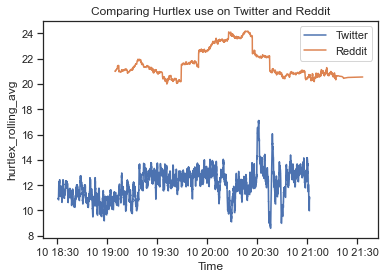

In [54]:


twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ 'hurtlex_rolling_avg' ] = twitter.hurtlex_pc.rolling(600).mean()
reddit[ 'hurtlex_rolling_avg' ] = reddit.hurtlex_pc.rolling(600).mean()

# Plot the sensitive twitter flag vs the hate speech models
ax=sns.lineplot(x="created", y="hurtlex_rolling_avg", label="Twitter",
             data=twitter)
ax=sns.lineplot(x="date", y="hurtlex_rolling_avg", label="Reddit",
             data=reddit)

plt.title("Comparing Hurtlex use on Twitter and Reddit")

plt.legend()
plt.xlabel("Time")

Text(0.5, 0, 'Time')

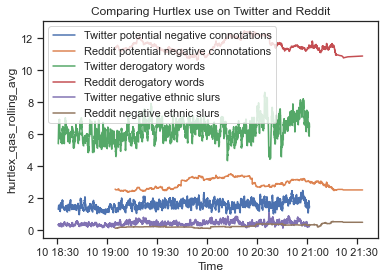

In [58]:


twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ 'hurtlex_qas_rolling_avg' ] = twitter.hurtlex_qas.rolling(600).mean()
reddit[ 'hurtlex_qas_rolling_avg' ] = reddit.hurtlex_qas.rolling(600).mean()
twitter[ 'hurtlex_cds_rolling_avg' ] = twitter.hurtlex_cds.rolling(600).mean()
reddit[ 'hurtlex_cds_rolling_avg' ] = reddit.hurtlex_cds.rolling(600).mean()
twitter[ 'hurtlex_nse_rolling_avg' ] = twitter.negative_stereotypes.rolling(600).mean()
reddit[ 'hurtlex_nse_rolling_avg' ] = reddit.negative_stereotypes.rolling(600).mean()

# Plot the sensitive twitter flag vs the hate speech models
ax=sns.lineplot(x="created", y="hurtlex_qas_rolling_avg", label="Twitter potential negative connotations",
             data=twitter)
ax=sns.lineplot(x="date", y="hurtlex_qas_rolling_avg", label="Reddit potential negative connotations",
             data=reddit)

ax=sns.lineplot(x="created", y="hurtlex_cds_rolling_avg", label="Twitter derogatory words",
             data=twitter)
ax=sns.lineplot(x="date", y="hurtlex_cds_rolling_avg", label="Reddit derogatory words",
             data=reddit)

ax=sns.lineplot(x="created", y="hurtlex_nse_rolling_avg", label="Twitter negative ethnic slurs",
             data=twitter)
ax=sns.lineplot(x="date", y="hurtlex_nse_rolling_avg", label="Reddit negative ethnic slurs",
             data=reddit)

plt.title("Comparing Hurtlex use on Twitter and Reddit")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Time")

In [ ]:
twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ 'male_genitalia_rolling_avg' ] = twitter.male_genitalia.rolling(600).mean()
reddit[ 'male_genitalia_rolling_avg' ] = reddit.male_genitalia.rolling(600).mean()
twitter[ 'female_genitalia_rolling_avg' ] = twitter.female_genitalia.rolling(600).mean()
reddit[ 'female_genitalia_rolling_avg' ] = reddit.female_genitalia.rolling(600).mean()

# Plot the sensitive twitter flag vs the hate speech models
ax=sns.lineplot(x="created", y="female_genitalia_rolling_avg", label="Twitter female genitalia",
             data=twitter)
ax=sns.lineplot(x="date", y="female_genitalia_rolling_avg", label="Reddit female genitalia",
             data=reddit)

ax=sns.lineplot(x="created", y="male_genitalia_rolling_avg", label="Twitter male genitalia",
             data=twitter)
ax=sns.lineplot(x="date", y="male_genitalia_rolling_avg", label="Reddit male genitalia",
             data=reddit)



plt.title("Comparing Hurtlex use on Twitter and Reddit")

plt.legend()
plt.xlabel("Time")

In [67]:

twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ 'hurtlex_nse_rolling_avg' ] = twitter.negative_stereotypes.rolling(600).mean()
reddit[ 'hurtlex_nse_rolling_avg' ] = reddit.negative_stereotypes.rolling(600).mean()

# Plot the sensitive twitter flag vs the hate speech models


ax=sns.lineplot(x="created", y="hurtlex_nse_rolling_avg", label="Twitter",
             data=twitter)
ax=sns.lineplot(x="date", y="hurtlex_nse_rolling_avg", label="Reddit",
             data=reddit)

plt.title("Comparing negative ethnic stereotype use on Twitter and Reddit")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Time")

Text(0.5, 0, 'Time')

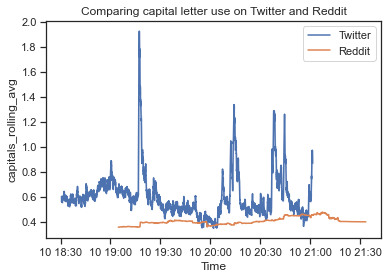

In [55]:
twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ 'capitals_rolling_avg' ] = twitter.capital_letters_p.rolling(600).mean()
reddit[ 'capitals_rolling_avg' ] = reddit.capital_letters_p.rolling(600).mean()
# Plot the sensitive twitter flag vs the hate speech models
ax=sns.lineplot(x="created", y="capitals_rolling_avg", label="Twitter",
             data=twitter)
ax=sns.lineplot(x="date", y="capitals_rolling_avg", label="Reddit",
             data=reddit)

plt.title("Comparing capital letter use on Twitter and Reddit")

plt.legend()
plt.xlabel("Time")

<ipython-input-107-8df3bddf6f3d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

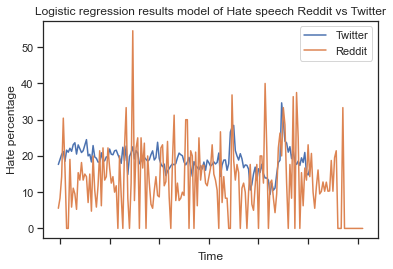

In [ ]:
# More plots comparing the two
ax=sns.lineplot(x="created", y="Hate percentage", label="Twitter",
             data=tw_log_graph)
ax=sns.lineplot(x="date", y="Hate percentage", label="Reddit",
             data=reddit_log_graph)
plt.title("Logistic regression results model of Hate speech Reddit vs Twitter")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.xlabel("Time")

In [ ]:
twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ '6000_rolling_avg' ] = twitter.compound.rolling(6000).mean()
reddit[ '600_rolling_avg' ] = reddit.compound.rolling(600).mean()
twitter.tail()

Unnamed: 0  Unnamed: 0.1            id                   created  \
175441      175441        175484  1.601680e+18 2022-12-10 21:01:24+00:00   
175433      175433        175476  1.601680e+18 2022-12-10 21:01:24+00:00   
175432      175432        175475  1.601680e+18 2022-12-10 21:01:24+00:00   
175436      175436        175479  1.601680e+18 2022-12-10 21:01:24+00:00   
175446      175446        175489  1.601680e+18 2022-12-10 21:01:24+00:00   

                                                     text possibly_sensitive  \
175441  South Gate subs are hilarious game on the line...      Not sensitive   
175433  france won, honestly it got close but it was a...      Not sensitive   
175432               Harry Kane you let your country down      Not sensitive   
175436                   C'EST ÇA MA FRANCE LET'S GOOOOOO      Not sensitive   
175446  So close Rashford. Well done bro. #ENG #FIFAWo...      Not sensitive   

                             user verified            rule language  ...  \
175441                       dame    False         Players       en  ...   
175433                       m 🎅🏻    False  England France       en  ...   
175432                        qb!    False         Players       en  ...   
175436  CameliE 🇫🇷 #TEMPEST1stWIN    False  England France       en  ...   
175446                Luenic Luke    False         Players       en  ...   

       log_regression       svc       dtc  random_forest  log_regression_rel  \
175441       Not hate  Not hate  Not hate           Hate                   0   
175433       Not hate  Not hate  Not hate       Not hate                   0   
175432           Hate      Hate  Not hate           Hate                   0   
175436           Hate      Hate  Not hate           Hate                   0   
175446       Not hate  Not hate      Hate       Not hate                   0   

        log_regression_eth  log_regression_gend  neural_network  \
175441            Not hate                    0        Not hate   
175433            Not hate                    0        Not hate   
175432            Not hate                    0            Hate   
175436            Not hate                    0            Hate   
175446            Not hate                    0        Not hate   

        mlp_ethnicity  6000_rolling_avg  
175441       Not hate          0.023726  
175433       Not hate          0.023983  
175432           Hate          0.023941  
175436       Not hate          0.023924  
175446       Not hate          0.024046  

[5 rows x 44 columns]

Text(0, 0.5, 'Compound sentiment analysis')

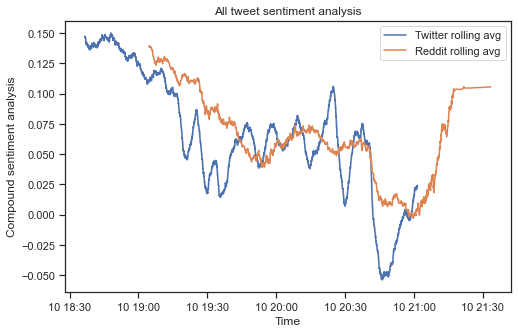

In [ ]:
plt.figure( figsize = ( 8, 5))
  
# plot a simple time series plot
# plot using rolling average

# using seaborn.lineplot()
sns.lineplot(x = 'created',
             y = '6000_rolling_avg',
             data = twitter,
             label = 'Twitter rolling avg')

sns.lineplot(x = 'date',
             y = '600_rolling_avg',
             data = reddit,
             label = 'Reddit rolling avg')
  
plt.xlabel('Time')
  
plt.title('All tweet sentiment analysis')
plt.ylabel('Compound sentiment analysis')

In [ ]:
twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ '600_rolling_avg_mbappe' ] = twitter.loc[twitter['text_nostop'].str.contains('Mbappe' or 'mbappe' or 'Mbappé' or 'mbappé', na = False)].compound.rolling(600).mean()
reddit[ '600_rolling_avg_mbappe' ] = reddit.loc[reddit['text_nostop'].str.contains('Mbappe' or 'mbappe' or 'Mbappé' or 'mbappé', na = False)].compound.rolling(600).mean()
twitter[ '600_rolling_avg_saka' ] = twitter.loc[twitter['text_nostop'].str.contains('Saka' or 'saka', na = False)].compound.rolling(600).mean()
reddit[ '600_rolling_avg_saka' ] = reddit.loc[reddit['text_nostop'].str.contains('Saka' or 'saka', na = False)].compound.rolling(600).mean()
twitter

Unnamed: 0  Unnamed: 0.1            id                   created  \
1                1             1  1.601650e+18 2022-12-10 18:29:57+00:00   
2                2             2  1.601650e+18 2022-12-10 18:29:57+00:00   
5                5             5  1.601650e+18 2022-12-10 18:29:57+00:00   
6                6             6  1.601650e+18 2022-12-10 18:29:57+00:00   
8                8             8  1.601650e+18 2022-12-10 18:29:57+00:00   
...            ...           ...           ...                       ...   
175441      175441        175484  1.601680e+18 2022-12-10 21:01:24+00:00   
175433      175433        175476  1.601680e+18 2022-12-10 21:01:24+00:00   
175432      175432        175475  1.601680e+18 2022-12-10 21:01:24+00:00   
175436      175436        175479  1.601680e+18 2022-12-10 21:01:24+00:00   
175446      175446        175489  1.601680e+18 2022-12-10 21:01:24+00:00   

                                                     text possibly_sensitive  \
1                       What has Islam got to do with it?      Not sensitive   
2         2002. That was also the Cup where Nigeria bo...      Not sensitive   
5        I'm sure there's more than one Scottish perso...      Not sensitive   
6                It’s definitely been an interesting one.      Not sensitive   
8        [ Croatia 🇭🇷 ]\n team won the match \n\n#FIFA...      Not sensitive   
...                                                   ...                ...   
175441  South Gate subs are hilarious game on the line...      Not sensitive   
175433  france won, honestly it got close but it was a...      Not sensitive   
175432               Harry Kane you let your country down      Not sensitive   
175436                   C'EST ÇA MA FRANCE LET'S GOOOOOO      Not sensitive   
175446  So close Rashford. Well done bro. #ENG #FIFAWo...      Not sensitive   

                                  user verified            rule language  ...  \
1                      Antonio Plescia    False        Worldcup       en  ...   
2       Shiv Ramdas Traing To Rite Buk     True  England France       en  ...   
5                    D. #cep He/Him ♥️    False  England France       en  ...   
6                        Darren Millar    False        Worldcup       en  ...   
8                        Manish Sharma    False        Worldcup       en  ...   
...                                ...      ...             ...      ...  ...   
175441                            dame    False         Players       en  ...   
175433                            m 🎅🏻    False  England France       en  ...   
175432                             qb!    False         Players       en  ...   
175436       CameliE 🇫🇷 #TEMPEST1stWIN    False  England France       en  ...   
175446                     Luenic Luke    False         Players       en  ...   

             dtc  random_forest  log_regression_rel  log_regression_eth  \
1       Not hate       Not hate                   0            Not hate   
2       Not hate       Not hate                   0            Not hate   
5       Not hate       Not hate                   0            Not hate   
6       Not hate       Not hate                   0            Not hate   
8       Not hate       Not hate                   0            Not hate   
...          ...            ...                 ...                 ...   
175441  Not hate           Hate                   0            Not hate   
175433  Not hate       Not hate                   0            Not hate   
175432  Not hate           Hate                   0            Not hate   
175436  Not hate           Hate                   0            Not hate   
175446      Hate       Not hate                   0            Not hate   

        log_regression_gend  neural_network  mlp_ethnicity  6000_rolling_avg  \
1                         0            Hate       Not hate               NaN   
2                         0            Hate           Hate               NaN   
5                   

Text(0, 0.5, 'Compound sentiment analysis')

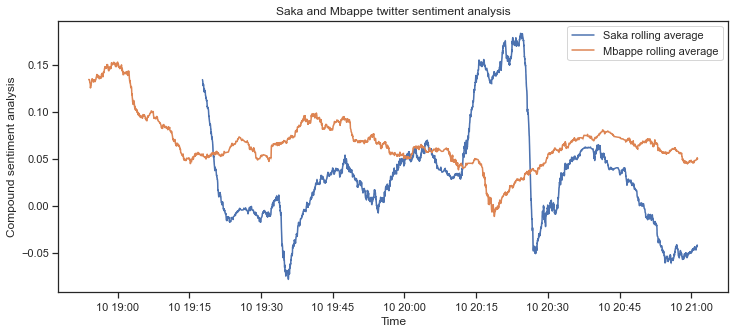

In [ ]:




plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# plot using rolling average

# using seaborn.lineplot()
sns.lineplot(x = 'created',
             y = '600_rolling_avg_saka',
             data = twitter,
             label = 'Saka rolling average')

# using seaborn.lineplot()
sns.lineplot(x = 'created',
             y = '600_rolling_avg_mbappe',
             data = twitter,
             label = 'Mbappe rolling average')
  
plt.xlabel('Time')
  
plt.title('Saka and Mbappe twitter sentiment analysis')
plt.ylabel('Compound sentiment analysis')

In [ ]:
twitter.loc[twitter['text'].str.contains('black', na =False)]

Unnamed: 0  Unnamed: 0.1            id                   created  \
731            731           731  1.601650e+18 2022-12-10 18:30:43+00:00   
846            846           847  1.601650e+18 2022-12-10 18:30:50+00:00   
1457          1457          1458  1.601650e+18 2022-12-10 18:31:35+00:00   
3265          3265          3266  1.601650e+18 2022-12-10 18:33:37+00:00   
3552          3552          3553  1.601650e+18 2022-12-10 18:33:58+00:00   
...            ...           ...           ...                       ...   
174814      174814        174857  1.601680e+18 2022-12-10 21:00:58+00:00   
174850      174850        174893  1.601680e+18 2022-12-10 21:00:58+00:00   
175234      175234        175277  1.601680e+18 2022-12-10 21:01:16+00:00   
175265      175265        175308  1.601680e+18 2022-12-10 21:01:17+00:00   
175365      175365        175408  1.601680e+18 2022-12-10 21:01:21+00:00   

                                                     text possibly_sensitive  \
731                                                I h...      Not sensitive   
846           Exactly what is white supremacy? I see b...      Not sensitive   
1457                             Morocco uses black magic      Not sensitive   
3265    Ok im not really into football, I live in Fran...      Not sensitive   
3552      THE IRONY! South Africa is currently on stag...      Not sensitive   
...                                                   ...                ...   
174814  Wheres all the disgusting english racist fans ...      Not sensitive   
174850  Gc’s England, at least they can’t bully the bl...      Not sensitive   
175234  Congrats England, you get to blame the black g...      Not sensitive   
175265   That’s it. Deport all the blacks out of England.      Not sensitive   
175365  "Before the USA played Wales on Nov. 21, he ha...      Not sensitive   

                                             user verified            rule  \
731                             Nancy Kemp Jordan    False         Players   
846                                  Large Amoeba    False  England France   
1457                                           Ma    False        Worldcup   
3265    Oh!LaLa! Mama#FBPE #GTTO #AGC🌈🇫🇷🇪🇺🇺🇦🕷#blm    False         Players   
3552                                          xal    False         Players   
...                                           ...      ...             ...   
174814                                    S Wavey    False         Players   
174850                                    ZeenoEU    False  England France   
175234                                Mark Rankin    False  England France   
175265                                      Peter    False  England France   
175365                         Rebecca St. Pierre    False        Worldcup   

       language  ...   dtc  random_forest  log_regression_rel  \
731          en  ...  Hate           Hate                   0   
846          en  ...  Hate           Hate                   0   
1457         en  ...  Hate           Hate                   0   
3265         en  ...  Hate           Hate                   0   
3552         en  ...  Hate           Hate                   0   
...         ...  ...   ...            ...                 ...   
174814       en  ...  Hate           Hate                   0   
174850       en  ...  Hate           Hate                   0   
175234       en  ...  Hate           Hate                   0   
175265       en  ...  Hate           Hate                   0   
175365       en  ...  Hate           Hate                   0   

        log_regression_eth  log_regression_gend  neural_network  \
731               Not hate                    0            Hate   
846                   Hate                    0            Hate   
1457              Not hate                    0        Not hate   
3265              Not hate                    0            Hate   
3552              Not hate                    0        Not hate   
...           

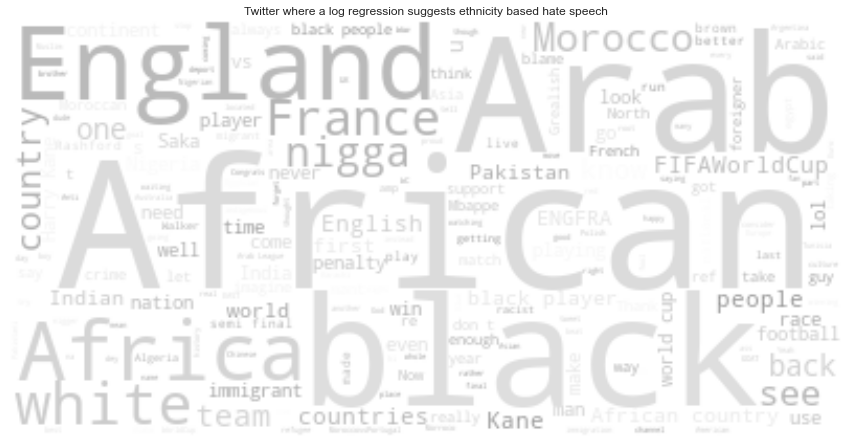

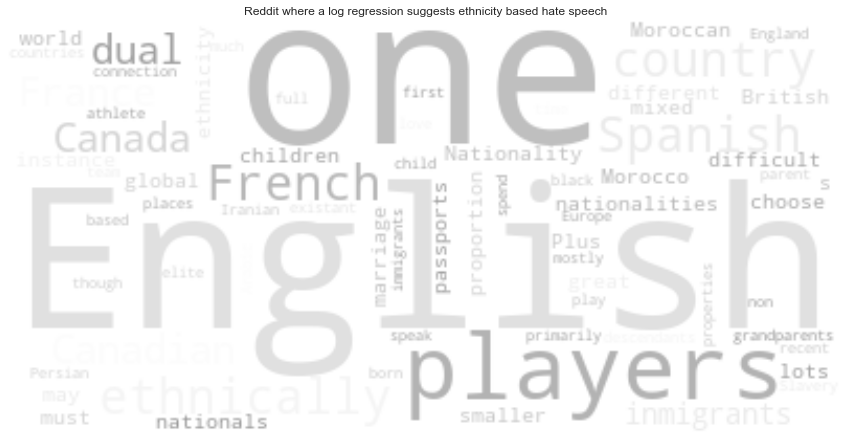

In [ ]:

text = " ".join(i for i in twitter['text_nostop'].loc[(twitter['log_regression_eth']=='Hate') & (twitter['text_nostop'].notnull())])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where a log regression suggests ethnicity based hate speech")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[(reddit['log_regression_eth']=='Hate') & (twitter['text_nostop'].notnull())])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where a log regression suggests ethnicity based hate speech")
plt.show()

In [34]:

text = " ".join(i for i in twitter['text_nostop'].loc[(twitter['mlp_ethnicity']=='Hate') & (twitter['text_nostop'].notnull())])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where a Neural network suggests ethnicity based hate speech")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[(reddit['mlp_ethnicity']=='Hate') & (twitter['text_nostop'].notnull())])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where a Neural network suggests ethnicity based hate speech")
plt.show()

NameError: name 'grey_color_func' is not defined

<Figure size 1080x720 with 0 Axes>

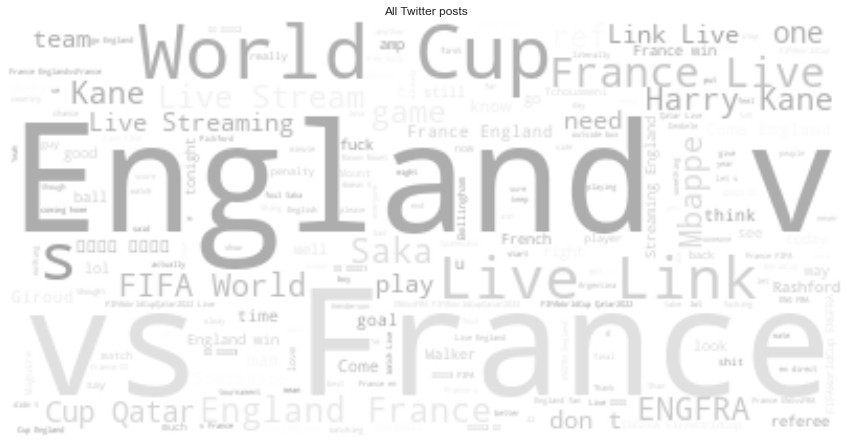

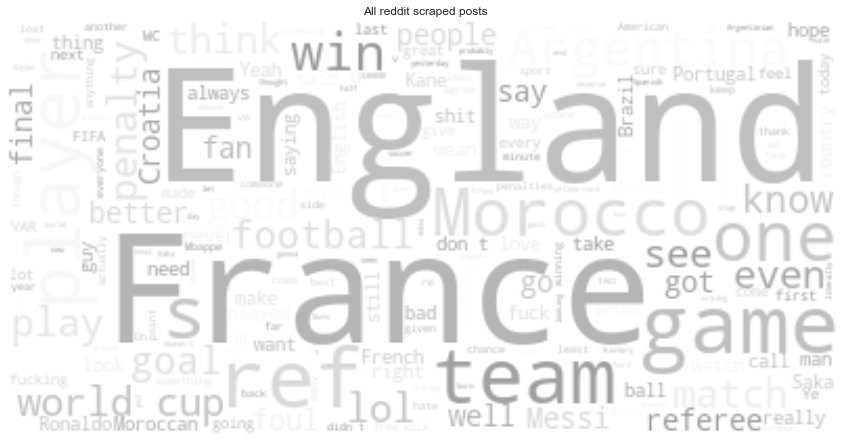

In [ ]:

text = " ".join(i for i in twitter['text_nostop'])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("All Twitter posts")
plt.show()

text = " ".join(i for i in reddit['text_nostop'])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("All reddit scraped posts")
plt.show()

In [ ]:
twitter.tail()

Unnamed: 0  Unnamed: 0.1            id                   created  \
175439      175439        175482  1.601680e+18 2022-12-10 21:01:24+00:00   
175429      175429        175472  1.601680e+18 2022-12-10 21:01:24+00:00   
175435      175435        175478  1.601680e+18 2022-12-10 21:01:24+00:00   
175432      175432        175475  1.601680e+18 2022-12-10 21:01:24+00:00   
175446      175446        175489  1.601680e+18 2022-12-10 21:01:24+00:00   

                                                     text possibly_sensitive  \
175439       Does England know what they say in Kentucky?      Not sensitive   
175429                            THAT'S MY BAGUETTE!!!!!      Not sensitive   
175435    hahahah you’re going home tea merchants 😹😹😹 ...      Not sensitive   
175432               Harry Kane you let your country down      Not sensitive   
175446  So close Rashford. Well done bro. #ENG #FIFAWo...      Not sensitive   

                    user verified            rule language  ...       dtc  \
175439                 g    False  England France       en  ...      Hate   
175429  𝟏𝟑𝟎𝟔𝟏𝟑 indigo? ⁷    False  England France       en  ...  Not hate   
175435          superior    False  England France       en  ...  Not hate   
175432               qb!    False         Players       en  ...  Not hate   
175446       Luenic Luke    False         Players       en  ...      Hate   

        random_forest  log_regression_rel  log_regression_eth  \
175439       Not hate                   0            Not hate   
175429       Not hate                   0            Not hate   
175435       Not hate                   0            Not hate   
175432           Hate                   0            Not hate   
175446       Not hate                   0            Not hate   

        log_regression_gend  neural_network  mlp_ethnicity  6000_rolling_avg  \
175439                    0        Not hate       Not hate          0.023766   
175429                    0        Not hate       Not hate          0.023848   
175435                    0        Not hate       Not hate          0.023915   
175432                    0            Hate           Hate          0.023941   
175446                    0        Not hate       Not hate          0.024046   

        600_rolling_avg_mbappe  600_rolling_avg_saka  
175439                     NaN                   NaN  
175429                     NaN                   NaN  
175435                     NaN                   NaN  
175432                     NaN                   NaN  
175446                     NaN                   NaN  

[5 rows x 46 columns]

In [ ]:
twitter['log_regression']

1         Not hate
2         Not hate
5             Hate
6         Not hate
8         Not hate
            ...   
175439    Not hate
175429    Not hate
175435    Not hate
175432        Hate
175446    Not hate
Name: log_regression, Length: 175447, dtype: object

In [ ]:
twitter['text'].loc[twitter['text'].str.contains('black', na =False)]

731                                                  I h...
846             Exactly what is white supremacy? I see b...
1457                               Morocco uses black magic
3265      Ok im not really into football, I live in Fran...
3552        THE IRONY! South Africa is currently on stag...
                                ...                        
174814    Wheres all the disgusting english racist fans ...
174850    Gc’s England, at least they can’t bully the bl...
175234    Congrats England, you get to blame the black g...
175265     That’s it. Deport all the blacks out of England.
175365    "Before the USA played Wales on Nov. 21, he ha...
Name: text, Length: 358, dtype: object

In [35]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


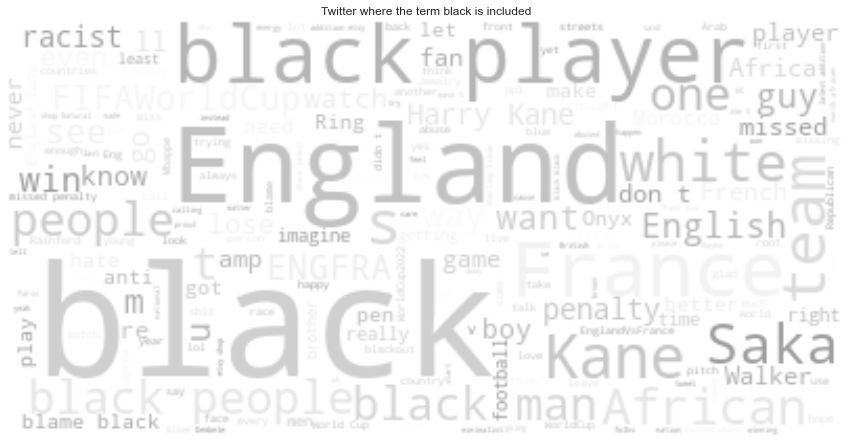

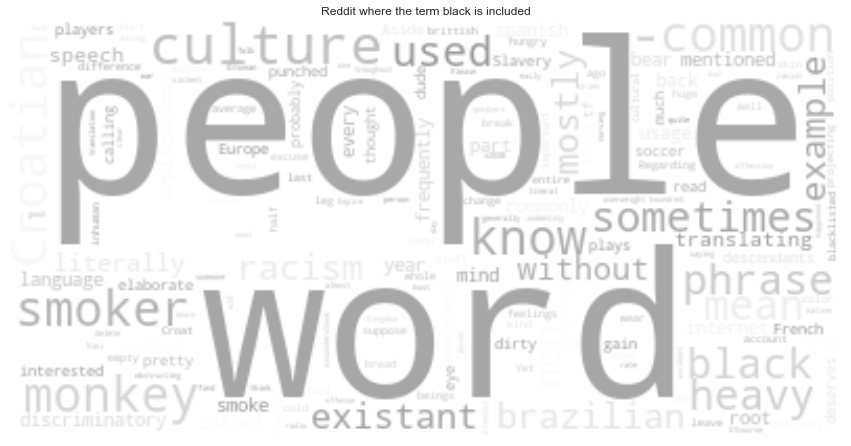

In [36]:
text = " ".join(i for i in twitter['text_nostop'].loc[twitter['text_nostop'].str.contains('black', na = False)])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the term black is included")
plt.show()


text = " ".join(i for i in reddit['text_nostop'].loc[reddit['text_nostop'].str.contains('black', na = False)])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the term black is included")
plt.show()

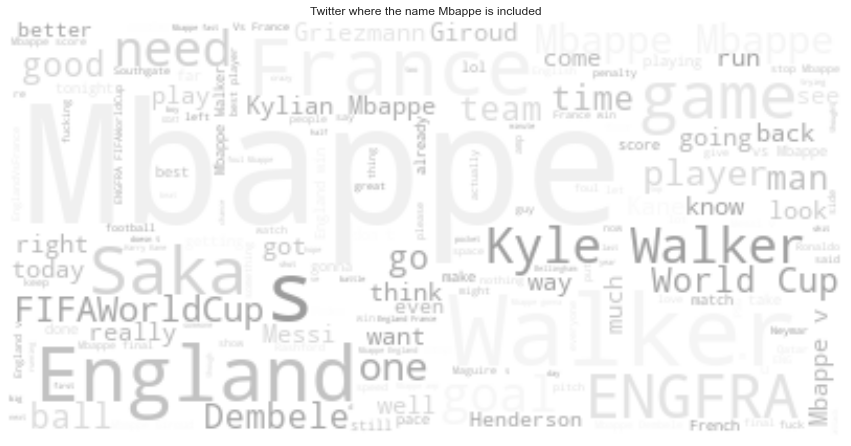

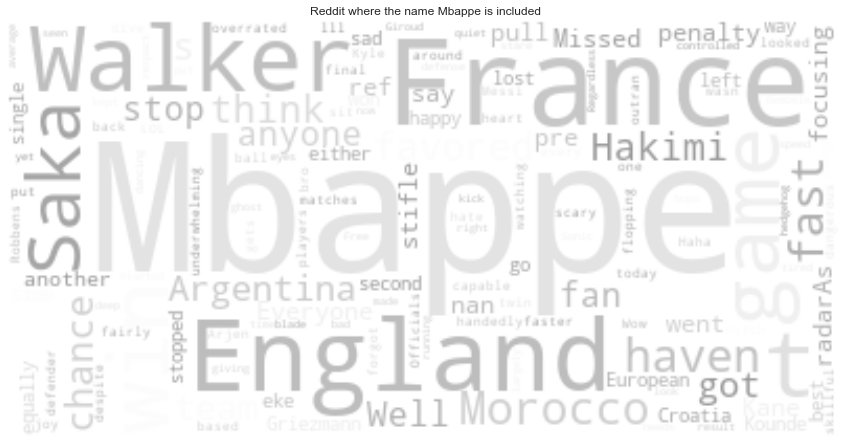

In [37]:
text = " ".join(i for i in twitter['text_nostop'].loc[twitter['text_nostop'].str.contains('Mbappe' or 'mbappe' or 'Mbappé' or 'mbappé', na = False)])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the name Mbappe is included")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[reddit['text_nostop'].str.contains('Mbappe' or 'mbappe' or 'Mbappé' or 'mbappé', na = False)])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the name Mbappe is included")
plt.show()

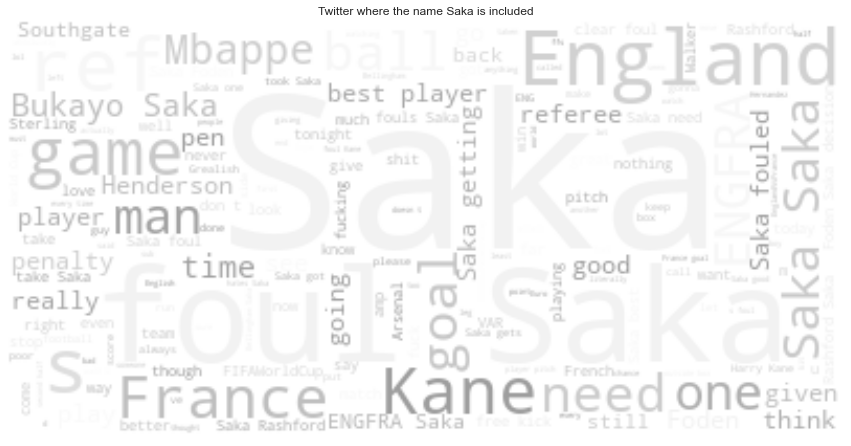

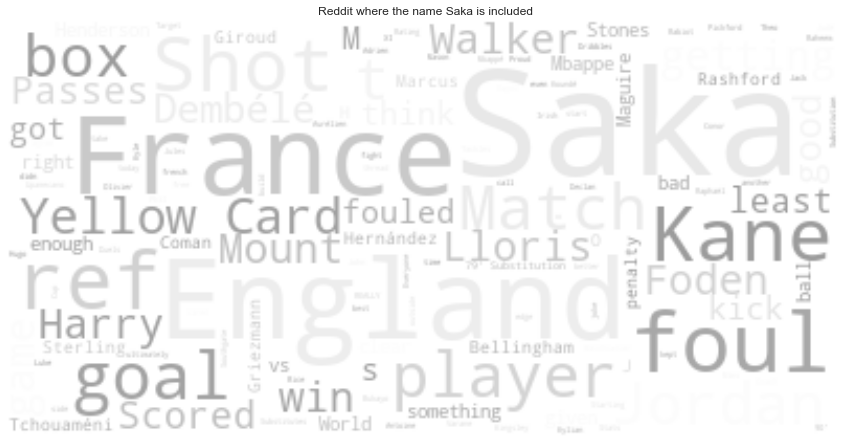

In [ ]:
text = " ".join(i for i in twitter['text_nostop'].loc[twitter['text_nostop'].str.contains('Saka' or "saka", na = False)])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the name Saka is included")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[reddit['text_nostop'].str.contains("Saka" or "saka", na = False)])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the name Saka is included")
plt.show()

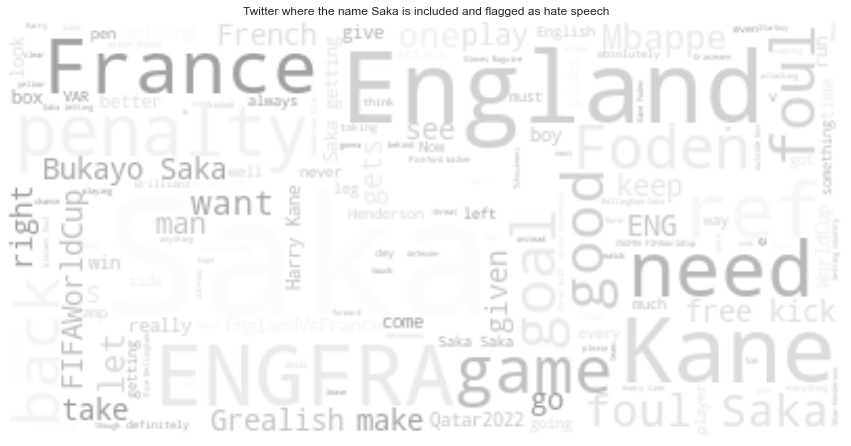

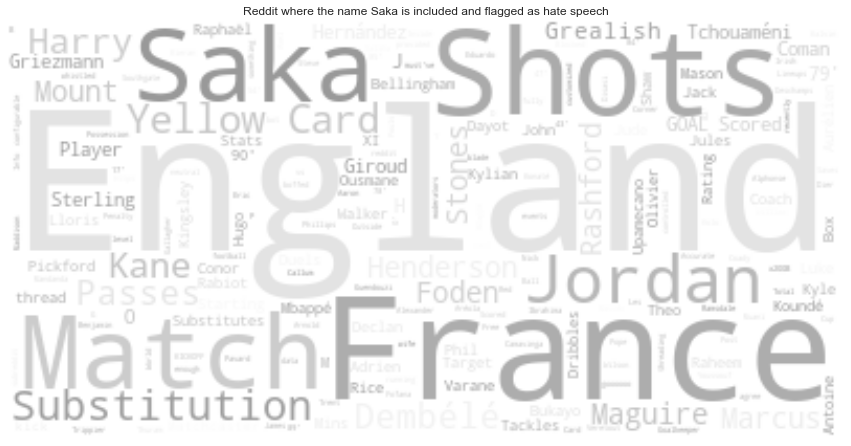

In [38]:
text = " ".join(i for i in twitter['text_nostop'].loc[(twitter['text_nostop'].str.contains('Saka' or "saka", na = False)) & (twitter['log_regression']=='Hate')])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the name Saka is included and flagged as hate speech")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[(reddit['text_nostop'].str.contains("Saka" or "saka", na = False)) & (reddit['log_regression']=='Hate')])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the name Saka is included and flagged as hate speech")
plt.show()

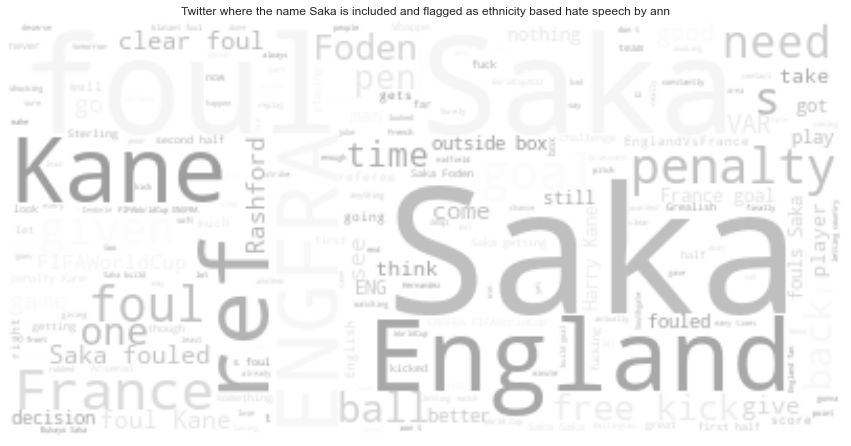

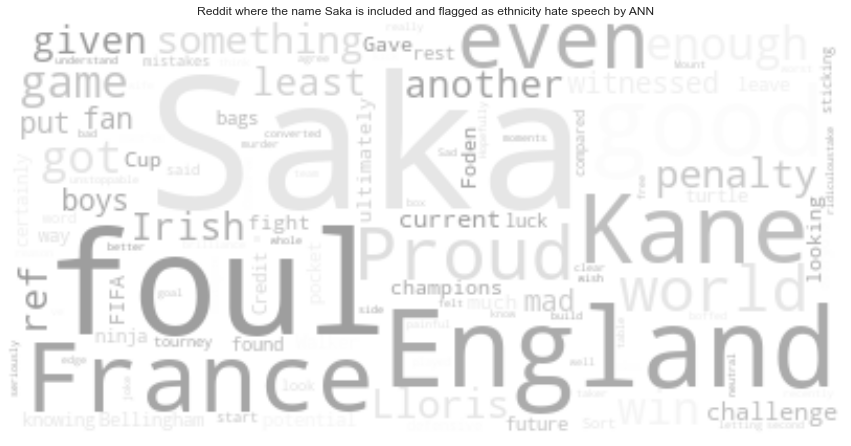

In [39]:
text = " ".join(i for i in twitter['text_nostop'].loc[(twitter['text_nostop'].str.contains('Saka' or "saka", na = False)) & (twitter['mlp_ethnicity']=='Hate')])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the name Saka is included and flagged as ethnicity based hate speech by ann")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[(reddit['text_nostop'].str.contains("Saka" or "saka", na = False)) & (reddit['mlp_ethnicity']=='Hate')])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the name Saka is included and flagged as ethnicity hate speech by ANN")
plt.show()

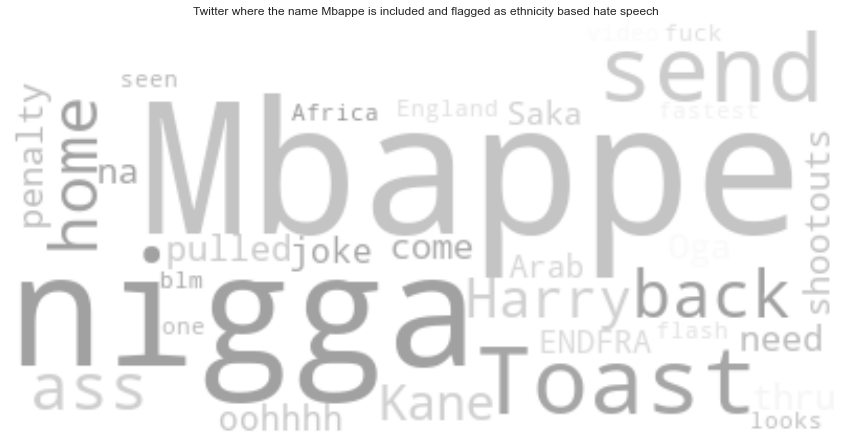

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
text = " ".join(i for i in twitter['text_nostop'].loc[(twitter['text_nostop'].str.contains('Mbappe' or "mbappe" or "Mbappé" or "mbappé",  na = False)) & (twitter['log_regression_eth']=='Hate')])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the name Mbappe is included and flagged as ethnicity based hate speech")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[(reddit['text_nostop'].str.contains('Mbappe' or "mbappe" or "Mbappé" or "mbappé", na = False)) & (reddit['log_regression_eth']=='Hate')])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the name Mbappe is included and flagged as ethnicity based hate speech")
plt.show()

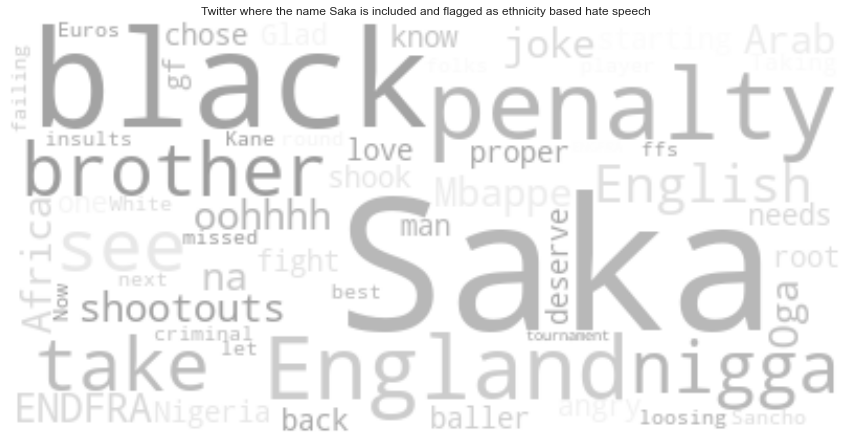

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
text = " ".join(i for i in twitter['text_nostop'].loc[(twitter['text_nostop'].str.contains('Saka' or "saka", na = False)) & (twitter['log_regression_eth']=='Hate')])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the name Saka is included and flagged as ethnicity based hate speech")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[(reddit['text_nostop'].str.contains("Saka" or "saka", na = False)) & (reddit['log_regression_eth']=='Hate')])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the name Saka is included and flagged as ethnicity based hate speech")
plt.show()

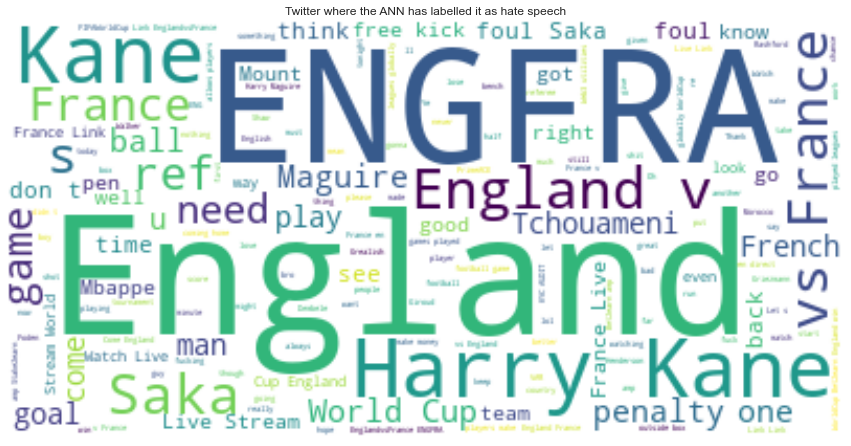

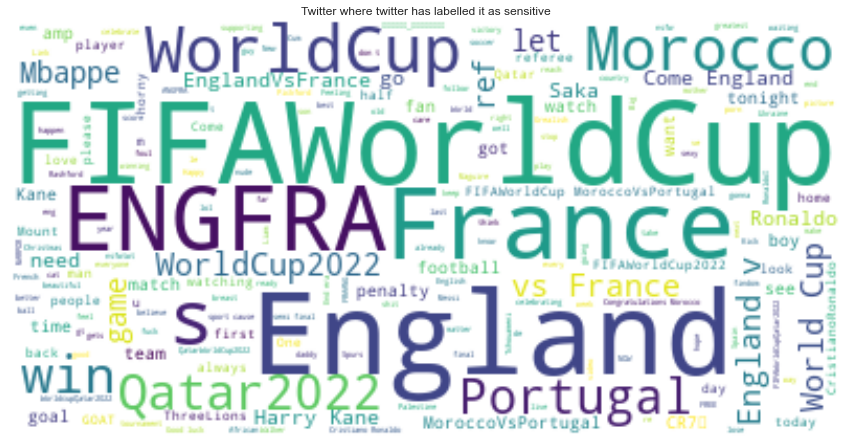

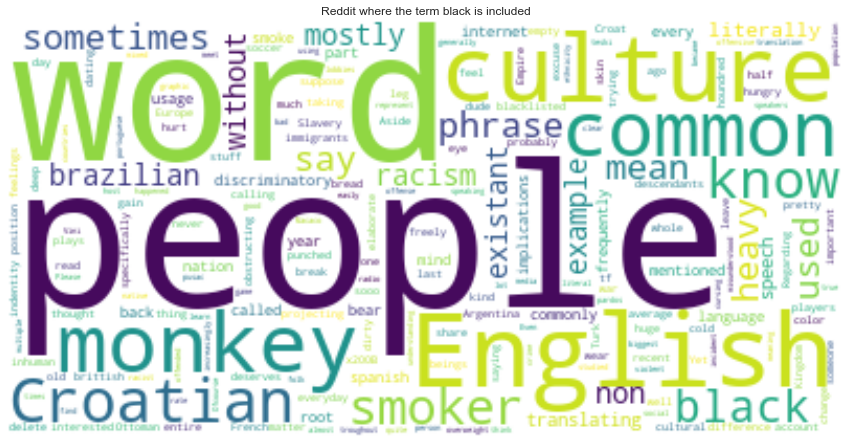

In [41]:
text = " ".join(i for i in twitter['text_nostop'].loc[twitter['neural_network']=='Hate'])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the ANN has labelled it as hate speech")
plt.show()

text = " ".join(i for i in twitter['text_nostop'].loc[twitter['possibly_sensitive']=='Sensitive'])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where twitter has labelled it as sensitive")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[reddit['text_nostop'].str.contains('black', na = False)])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the term black is included")
plt.show()

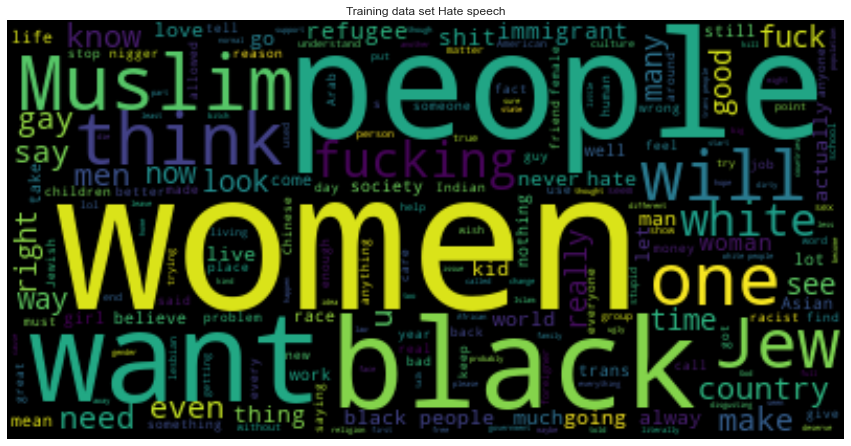

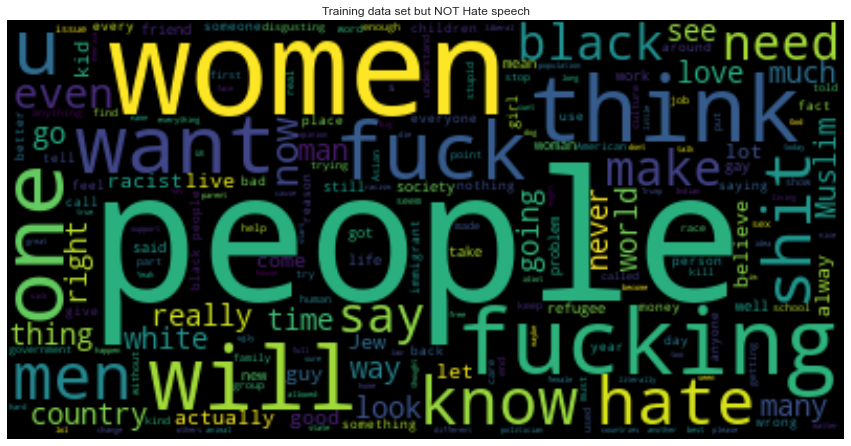

In [ ]:
text = " ".join(i for i in training_data['text'].loc[training_data['Hate speech']==1])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Training data set Hate speech")
plt.show()

text = " ".join(i for i in training_data['text'].loc[training_data['Hate speech']==0])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Training data set but NOT Hate speech")
plt.show()